# Project 3

Consider the image Bird 2 degraded, degraded by mild atmospheric turbulence
blurring.

(a) Estimate the parameter k of the model developed by Hufnagel & Stanley.

(b) Construct and plot the restored image using the H(u,v) obtained.




## Figure of the Fourier magnitude spectrum of the degraded image Bird 2 degraded 

[]

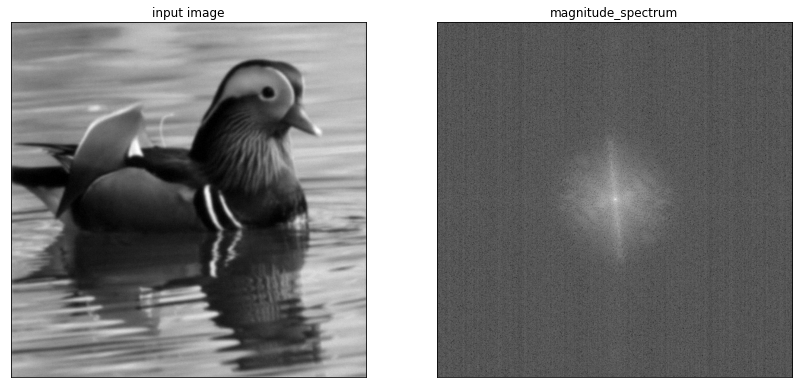

In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

#plot
fig, (ax1, ax2) = plt.subplots(figsize=(14,9), nrows=1, ncols=2)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('input image')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(magnitude_spectrum, cmap = 'gray')
ax2.set_title('magnitude_spectrum')
ax2.set_xticks([])
ax2.set_yticks([])

## Figure of the Fourier magnitude (frequency response) of degradation model H(u,v) 

[]

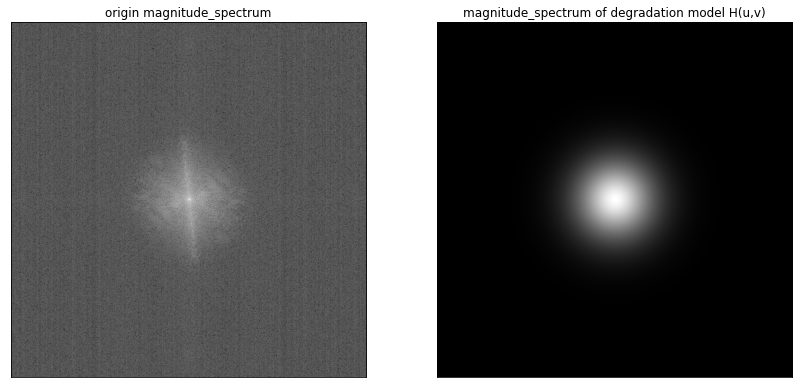

In [2]:
def H(u,v,k):
  M=600
  N=600
  return (math.e)** ( (-k)*( ((u-M/2)**2+ (v-N/2)**2)**(5/6) ) )


degradation=np.zeros( np.shape(magnitude_spectrum) )
for u in range(600):
  for v in range(600):
    degradation[u][v]=H(u,v,0.001)

#plot
fig, (ax1, ax2) = plt.subplots(figsize=(14,9), nrows=1, ncols=2)
ax1.imshow(magnitude_spectrum, cmap = 'gray')
ax1.set_title('origin magnitude_spectrum')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(degradation, cmap = 'gray')
ax2.set_title('magnitude_spectrum of degradation model H(u,v)')
ax2.set_xticks([])
ax2.set_yticks([])

## Figures of the output images using different radii (50, 85, 120) of inverse filtering 

[]

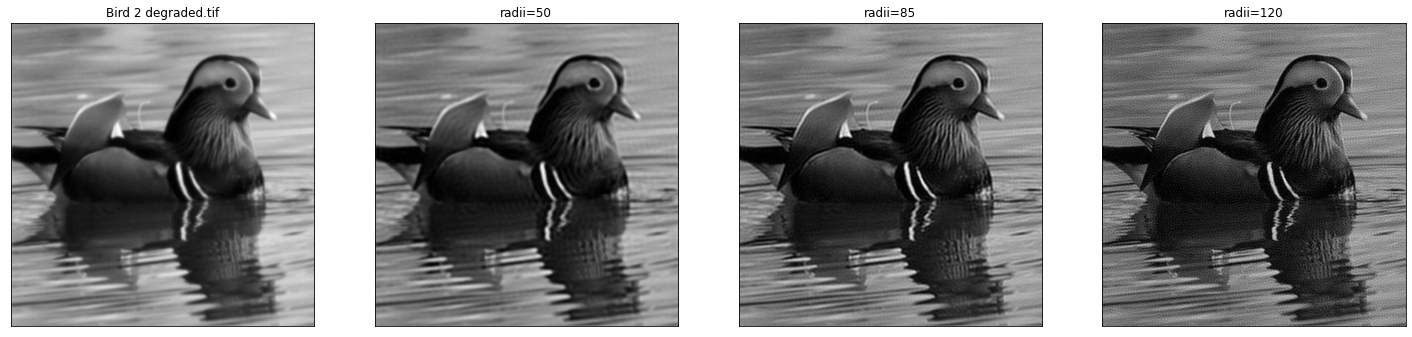

In [3]:
def filter(image_fshift,r,k):
  output=image_fshift
  for u in range(600):
    for v in range(600):
      if ((u-300)**2+(v-300)**2)**0.5 <r:
        output[u][v]=image_fshift[u][v]/H(u,v,k)
  return output

#fft
img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# filter & inverse fft to get the image back 
img_back_50 = np.fft.ifftshift(filter(fshift,50,0.001))
img_back_50 = np.fft.ifft2(img_back_50)
img_back_50 = np.abs(img_back_50)

#fft
img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# filter & inverse fft to get the image back 
img_back_85 = np.fft.ifftshift(filter(fshift,85,0.001))
img_back_85 = np.fft.ifft2(img_back_85)
img_back_85 = np.abs(img_back_85)

#fft
img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# filter & inverse fft to get the image back 
img_back_120 = np.fft.ifftshift(filter(fshift,120,0.001))
img_back_120 = np.fft.ifft2(img_back_120)
img_back_120 = np.abs(img_back_120)



#plot
fig, (ax1, ax2 ,ax3 ,ax4) = plt.subplots(figsize=(25,25), nrows=1, ncols=4)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Bird 2 degraded.tif')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(img_back_50, cmap = 'gray')
ax2.set_title('radii=50')
ax2.set_xticks([])
ax2.set_yticks([])

ax3.imshow(img_back_85, cmap = 'gray')
ax3.set_title('radii=85')
ax3.set_xticks([])
ax3.set_yticks([])

ax4.imshow(img_back_120, cmap = 'gray')
ax4.set_title('radii=120')
ax4.set_xticks([])
ax4.set_yticks([])

# Model parameter k
choose k=0.001 (mild turbulence)

[]

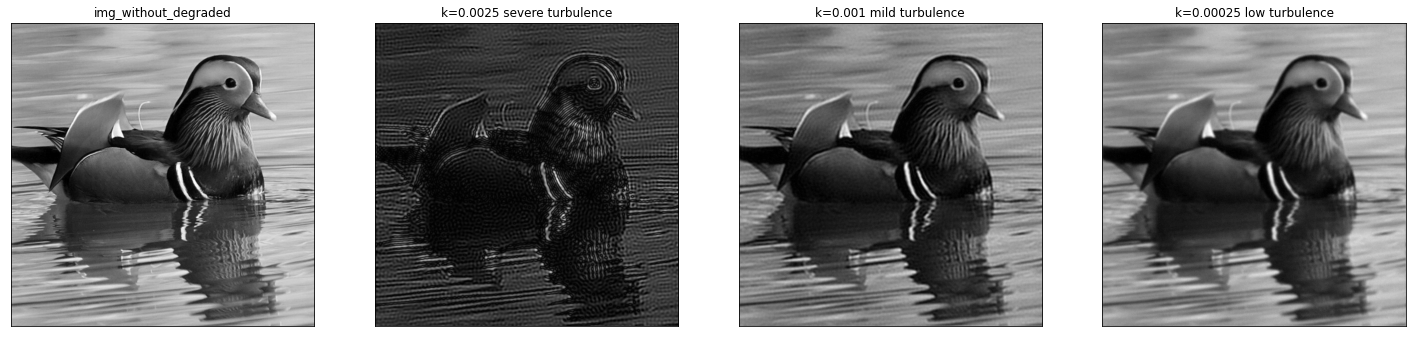

In [4]:
img_without_degraded = cv2.imread('Bird 2.tif',0)

#fft
img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# filter & inverse fft to get the image back 
img_back_0025 = np.fft.ifftshift(filter(fshift,85,0.0025))
img_back_0025 = np.fft.ifft2(img_back_0025)
img_back_0025 = np.abs(img_back_0025)

#fft
img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# filter & inverse fft to get the image back 
img_back_001 = np.fft.ifftshift(filter(fshift,85,0.001))
img_back_001 = np.fft.ifft2(img_back_001)
img_back_001 = np.abs(img_back_001)

#fft
img = cv2.imread('Bird 2 degraded.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# filter & inverse fft to get the image back 
img_back_00025 = np.fft.ifftshift(filter(fshift,85,0.00025))
img_back_00025 = np.fft.ifft2(img_back_00025)
img_back_00025 = np.abs(img_back_00025)



#plot
fig, (ax1, ax2 ,ax3 ,ax4) = plt.subplots(figsize=(25,25), nrows=1, ncols=4)
ax1.imshow(img_without_degraded, cmap = 'gray')
ax1.set_title('img_without_degraded')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(img_back_0025, cmap = 'gray')
ax2.set_title('k=0.0025 severe turbulence')
ax2.set_xticks([])
ax2.set_yticks([])

ax3.imshow(img_back_001, cmap = 'gray')
ax3.set_title('k=0.001 mild turbulence')
ax3.set_xticks([])
ax3.set_yticks([])

ax4.imshow(img_back_00025, cmap = 'gray')
ax4.set_title('k=0.00025 low turbulence')
ax4.set_xticks([])
ax4.set_yticks([])